In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")

In [84]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    float64
dtypes: float64(8), int64(7), object(1)
memory usage: 30.5+ KB


In [86]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [87]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [88]:
df = df.drop(['day','month','year'],axis=1)
df = df.drop('Unnamed: 0', axis=1)


In [89]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [90]:
## Indepemdent and depepndent features 
X = df.drop('FWI',axis=1)    # except 'FWI' column and rest all the featrues will be independent
y = df['FWI']      # 'FWI' is dependent feature

In [91]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [93]:
X_train.shape

(182, 11)

In [94]:
X_test.shape

(61, 11)

In [95]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [96]:
## Multicollinearity  

In [97]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [98]:
corr_features = correlation(X_train, 0.85)

In [99]:
corr_features

{'BUI', 'DC'}

In [100]:
X_train.drop(corr_features, axis = 1, inplace= True)
X_test.drop(corr_features, axis = 1, inplace= True)
X_train.shape, X_test.shape


((182, 9), (61, 9))

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [102]:
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0.0
141,31,72,14,0.2,60.2,3.8,0.8,0,1.0
192,40,31,15,0.0,94.2,22.5,16.6,1,1.0
68,32,60,18,0.3,77.1,11.3,2.2,0,0.0
119,32,47,14,0.7,77.5,7.1,1.8,0,0.0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0.0
14,28,80,17,3.1,49.4,3.0,0.4,0,0.0
92,25,76,17,7.2,46.0,1.3,0.2,0,0.0
179,34,59,16,0.0,88.1,19.5,7.4,1,1.0


In [104]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

Text(0.5, 1.0, 'After scaling')

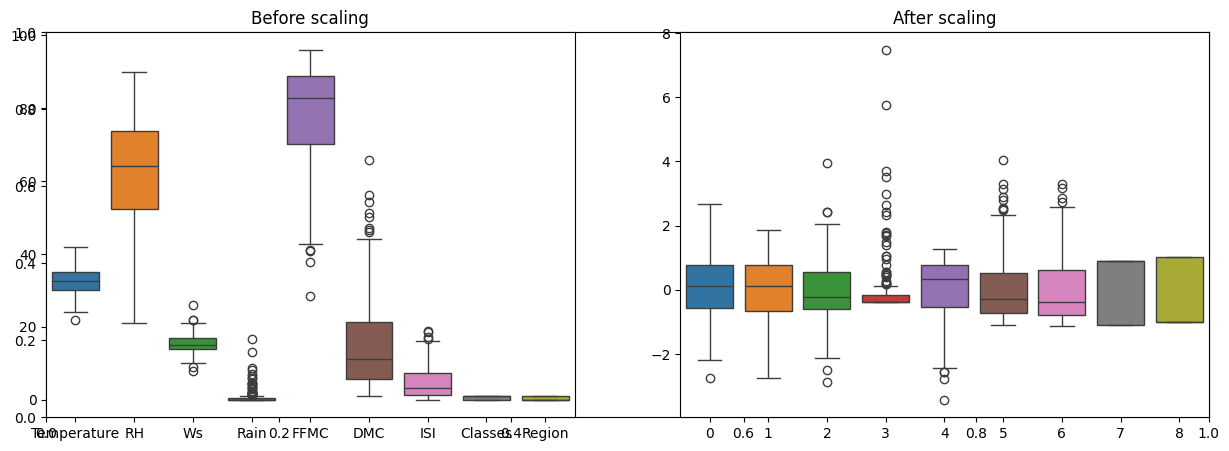

In [105]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After scaling")

0.5468236465249978
0.9847657384266951


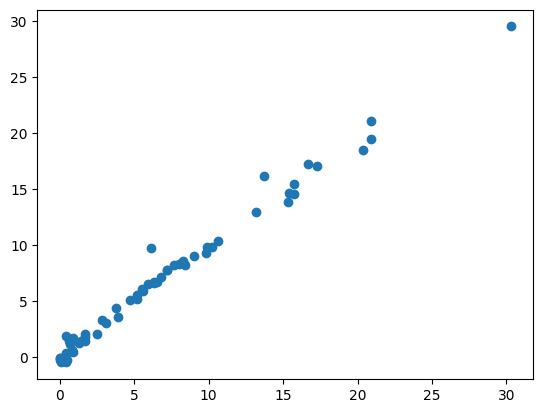

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred= linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
score = r2_score(y_test, y_pred)
print(score)
plt.scatter(y_test,y_pred)

1.133175994914409
0.9492020263112388


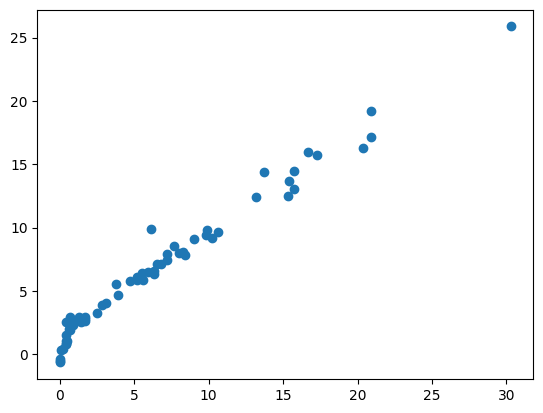

In [107]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

reg = Lasso()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
score = r2_score(y_test, y_pred)
print(score)
plt.scatter(y_test,y_pred)


In [108]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

0.619970115826343
0.9820946715928275


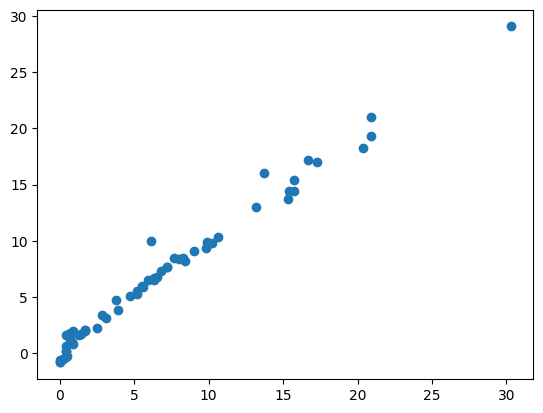

In [109]:
y_pred = lassocv.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
score = r2_score(y_test, y_pred)
print(score)
plt.scatter(y_test,y_pred)

0.5642305340105715
0.9842993364555512


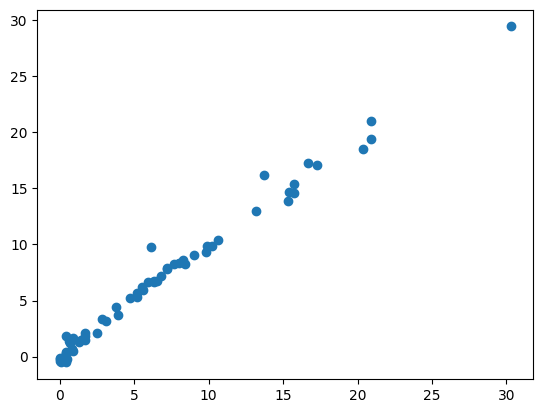

In [111]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
score = r2_score(y_test, y_pred)
print(score)
plt.scatter(y_test,y_pred)


0.5642305340105715
0.9842993364555512


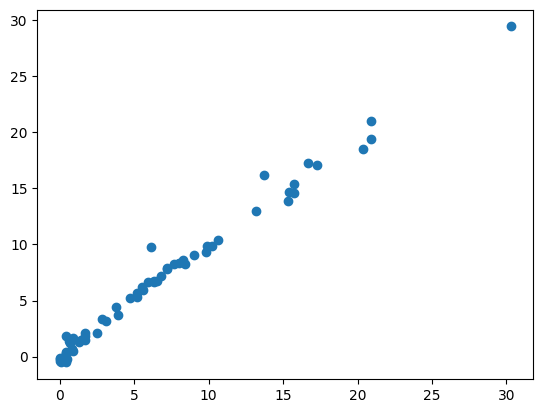

In [112]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
score = r2_score(y_test, y_pred)
print(score)
plt.scatter(y_test,y_pred)


0.5642305340105715
0.9842993364555512


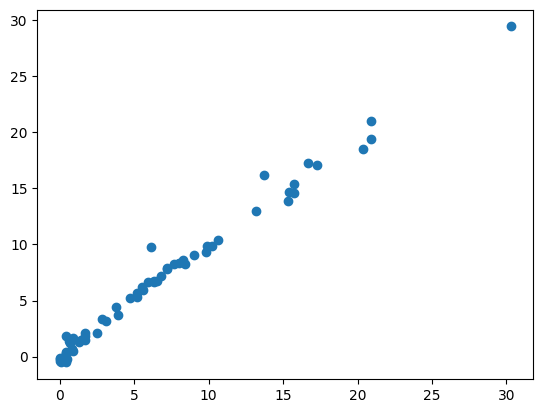

In [113]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
score = r2_score(y_test, y_pred)
print(score)
plt.scatter(y_test,y_pred)

0.5642305340105715
0.9842993364555512


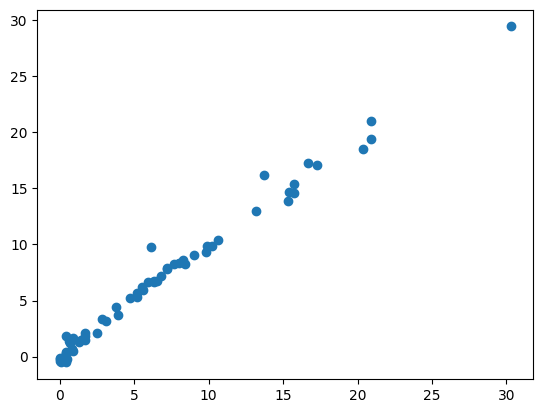

In [115]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
score = r2_score(y_test, y_pred)
print(score)
plt.scatter(y_test,y_pred)


In [116]:
ridge

Ridge()

In [117]:
scaler

StandardScaler()

In [119]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
